Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Make sure that in addition to the code, you provide written answers for all questions of the assignment. 

Below, please fill in your name and collaborators:

'c:\\Users\\msmetanin\\PYthon Projects'

For this assignment, we will analyze the open dataset with data on the passengers aboard the Titanic.

The data file for this assignment can be downloaded from Kaggle website: https://www.kaggle.com/c/titanic/data, file `train.csv`. It is also attached to the assignment page. The definition of all variables can be found on the same Kaggle page, in the Data Dictionary section.

Read the data from the file into pandas DataFrame. Analyze, clean and transform the data to answer the following question: 

**What categories of passengers were most likely to survive the Titanic disaster?**

# Import

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
plt.style.use('ggplot')
from IPython.display import display
data = pd.read_csv(r'\\cmpfs01\personal\msmetanin\Documents\Courses\Data Science\Assignment\train.csv')
# kaggle competitions download -c titanic
df = data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df1 = data.copy

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Answears to Assignment questions

In [7]:
df_age = df.groupby([
                    'Pclass',
                     "Sex", 
                    'not_single',
                 #    'Embarked', 
                    ])\
                    [['Age', 'Survived']]\
                    .agg([ 'mean']).round(2)
print(df_age)

KeyError: 'not_single'

In [8]:
survived(df)

NameError: name 'survived' is not defined

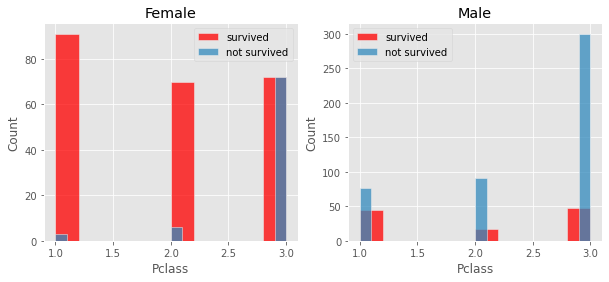

In [261]:
survived_column(df, 'Pclass')

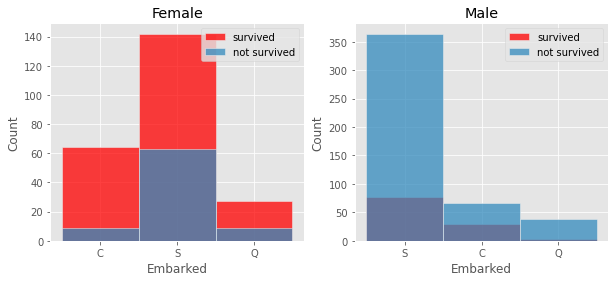

In [230]:
survived_column(df, 'Embarked')

# START of the Data analysis

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Survival Distribution Drawing Functions


## Survival distribution

In [10]:
def survived(df): 
    #draws survival distribution over sex and age, takes dataframe as argumnet
    survived = 'survived'
    not_survived = 'not survived'
    fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))
    women = df[df['Sex'] == 'female']
    men =  df[df['Sex'] == 'male']
    ax = sns.histplot(women[women['Survived']==1].Age.dropna(), bins=15, label = survived, ax = axes[0], kde =False, color= 'red')
    ax = sns.histplot(women[women['Survived']==0].Age.dropna(), bins=20, label = not_survived, ax = axes[0], kde =False)
    ax.legend()
    ax.set_title('Female')
    ax = sns.histplot(men[men['Survived']==1].Age.dropna(), bins=15, label = survived, ax = axes[1], kde = False, color = 'red')
    ax = sns.histplot(men[men['Survived']==0].Age.dropna(), bins=20, label = not_survived, ax = axes[1], kde = False)
    ax.legend()
    _ = ax.set_title('Male')
    return



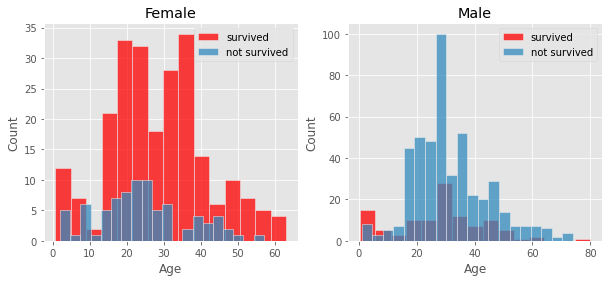

In [99]:
survived(df) # age input by Pclass, Sex and number of relative 

## Function to draw two datframes

In [11]:
def survived_explicit(df1, df2): 
    '''draws survival distribution over sex and age from two dataframes as argument'''
    survived = 'survived'
    not_survived = 'not survived'
    fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (16,8), squeeze = False)
    women1 = df1[df1['Sex'] == 'female']
    men1 =  df1[df1['Sex'] == 'male']

    ax = sns.histplot(women1[women1['Survived']==1].Age.dropna(), bins=15, label = survived, ax = axes[0][0], kde =False, color= 'red')
    ax = sns.histplot(women1[women1['Survived']==0].Age.dropna(), bins=20, label = not_survived, ax = axes[0][0], kde =False)
    ax.legend()
    ax.set_title('Female')
    ax = sns.histplot(men1[men1['Survived']==1].Age.dropna(), bins=15, label = survived, ax = axes[1][0], kde = False, color = 'red')
    ax = sns.histplot(men1[men1['Survived']==0].Age.dropna(), bins=20, label = not_survived, ax = axes[1][0], kde = False)
    ax.legend()
    _ = ax.set_title('Male')
    
    women2 = df2[df2['Sex'] == 'female']
    men2 =  df2[df2['Sex'] == 'male']    
    ax = sns.histplot(women2[women2['Survived']==1].Age.dropna(), bins=15, label = survived, ax = axes[0][1], kde =False, color= 'red')
    ax = sns.histplot(women2[women2['Survived']==0].Age.dropna(), bins=20, label = not_survived, ax = axes[0][1], kde =False)
    ax.legend()
    ax.set_title('Female')
    ax = sns.histplot(men2[men2['Survived']==1].Age.dropna(), bins=15, label = survived, ax = axes[1][1], kde = False, color = 'red')
    ax = sns.histplot(men2[men2['Survived']==0].Age.dropna(), bins=20, label = not_survived, ax = axes[1][1], kde = False)
    ax.legend()
    _ = ax.set_title('Male')
    return


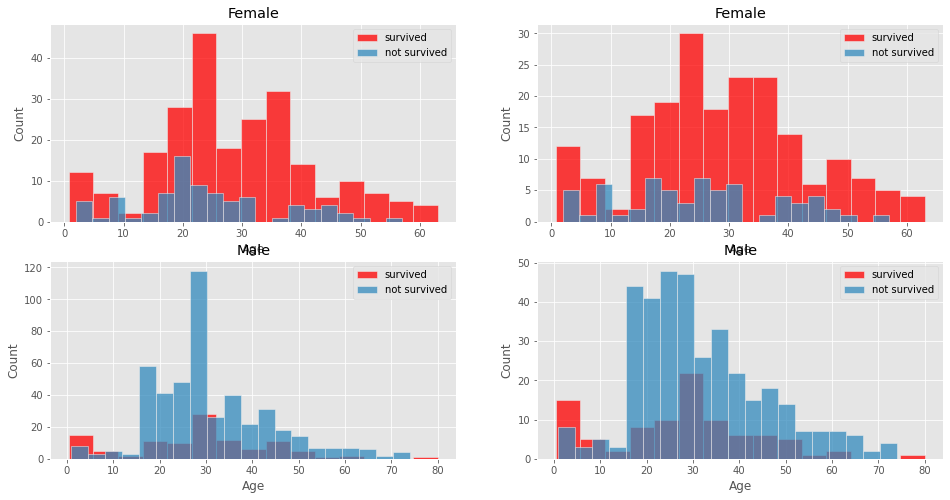

In [339]:
survived_explicit(df, data)

<AxesSubplot:xlabel='Sex'>

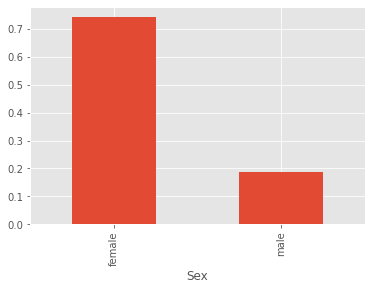

In [245]:
df.groupby(['Sex'])['Survived'].mean().plot(kind = 'bar')

## Surviel drawing function by attribute

In [341]:
def survived_column(df, coulmn_name): 
    '''Draws survival distribution over sex, takes dataframe and numerical column as arguments'''
    survived = 'survived'
    not_survived = 'not survived'
    fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))
    women = df[df['Sex'] == 'female']
    men =  df[df['Sex'] == 'male']
    ax = sns.histplot(women[women['Survived']==1][coulmn_name].dropna(), bins=10, label = survived, ax = axes[0],  kde =False, color = 'red')
    ax = sns.histplot(women[women['Survived']==0][coulmn_name].dropna(), bins=20, label = not_survived, ax = axes[0], kde =False)
    ax.legend()
    ax.set_title('Female')
    ax = sns.histplot(men[men['Survived']==1][coulmn_name].dropna(), bins=10, label = survived, ax = axes[1], kde = False, color = 'red')
    ax = sns.histplot(men[men['Survived']==0][coulmn_name].dropna(), bins=20, label = not_survived, ax = axes[1], kde = False)
    ax.legend()
    _ = ax.set_title('Male')
    return



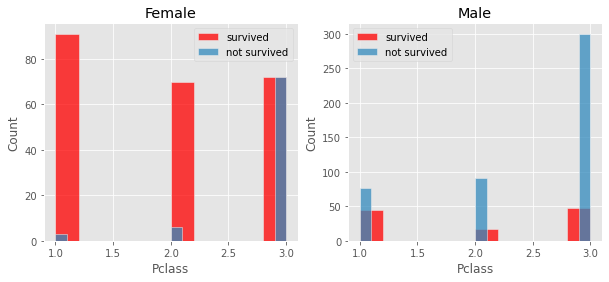

In [234]:
survived_column(df, 'Pclass') # age input by Pclass, Sex and number of relative 

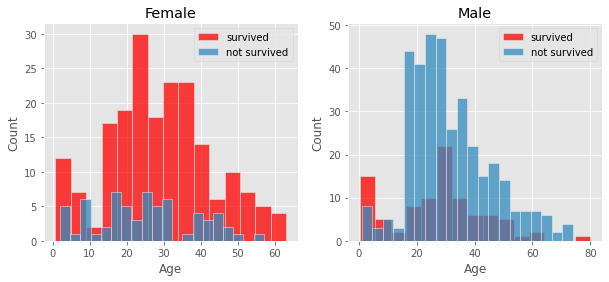

In [27]:
survived(data) # Original Data


In [194]:
# pd.crosstab(df['Age'], df['Sex'], df['Survived'], aggfunc = 'count').plot(kind = "bar", stacked = False)

In [31]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'relatives',
       'not_single'],
      dtype='object')

In [195]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [197]:
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [33]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  relatives    891 non-null    int64  
 13  not_single   891 non-null    float64
dtypes: float64(3), int64(6), object(5)
memory usage: 97.6+ KB


# Checking for missing values

In [160]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

`Age` group has 177 missing values. To fiil the missing age it is important to find right category where age distribution is closest to normal. Will try with mean. Also if I get time try to fill missing values by random valuse within slected grouped attributes.


In [169]:
df['Age'].isnull().sum() - data['Age'].isnull().sum()

0

<AxesSubplot:ylabel='Frequency'>

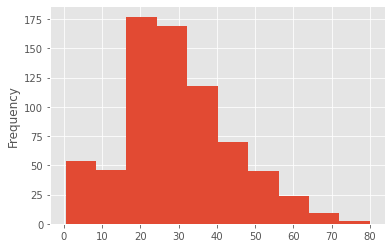

In [162]:
df['Age'].plot(kind = 'hist')

In [212]:
df['Age'].median()

27.0

In [211]:
df['Age'].describe()

count    891.000000
mean      29.231392
std       13.486564
min        0.420000
25%       21.000000
50%       27.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

In [171]:
df.groupby(["Sex",'Pclass'])['Age'].value_counts()

Sex     Pclass  Age 
female  1       35.0    6
                24.0    5
                30.0    5
                22.0    4
                39.0    4
                       ..
male    3       59.0    1
                61.0    1
                65.0    1
                70.5    1
                74.0    1
Name: Age, Length: 283, dtype: int64

# Siblings Parents


## Imapct Number of relatives on surveyship

### Creatiing: single or not single category
<li> Creating Relatives and single  / not single categories

In [6]:
#return True if there is at least one relative
for dataset in df:
    df['relatives'] = df['SibSp'] + df['Parch']
    df.loc[df['relatives'] > 0, 'not_single'] = 1
    df.loc[df['relatives'] == 0, 'not_single'] = 0
    df['not_single'] = df['not_single'].astype(int)

# df['Rel'] = df['SibSp'] + df['Parch']
    
data_not_single = df['not_single'].value_counts()

In [7]:
df_4 = df.copy()

In [10]:
# df_relatives = df.groupby(['Sex','relatives', "Parch", "SibSp"])[['Survived', 'Pclass','Age', ]].agg('mean')

df_relatives = \
    df.groupby(['Pclass',\
                           'Sex', \
                           'not_single',\
                            'Age_Group'
                          # "Parch", 
                          # "SibSp",
                         
                          ]) \
                            [['Survived', 
                                  'Age', ]] \
                            .agg('mean')

df_relatives

Survived        Age
Pclass Sex    not_single Age_Group                     
1      female 0          <10             NaN        NaN
                         10-19        1.0000  17.500000
                         20-29        1.0000  24.250000
                         30-39        1.0000  33.083333
                         40-49        1.0000  44.000000
...                                      ...        ...
3      male   1          20-29        0.1875  25.062500
                         30-39        0.0000  34.625000
                         40-49        0.0000  41.250000
                         50-59           NaN        NaN
                         >60             NaN        NaN

[84 rows x 2 columns]

In [309]:
def relatives(name):
    '''Grouping by Class, Sex, Single'''
    print(name.groupby(['Pclass',\
                           'Sex', \
                           'not_single',\
                          # "Parch", 
                          # "SibSp",
                         
                          ]) \
                            [['Survived', 
                                  'Age', ]] \
                            .agg('mean','median').round(2))
    return
    
relatives(df)

                          Survived    Age
Pclass Sex    not_single                 
1      female 0.0             0.97  34.94
              1.0             0.97  34.42
       male   0.0             0.33  44.60
              1.0             0.43  37.47
2      female 0.0             0.91  33.38
              1.0             0.93  25.55
       male   0.0             0.10  33.90
              1.0             0.28  25.20
3      female 0.0             0.62  23.57
              1.0             0.42  20.67
       male   0.0             0.12  29.18
              1.0             0.18  18.92


# Imputing missing values of Age and Embarking
by median of class, sex and embarked categories 

## Age Distribution by Age and Survival

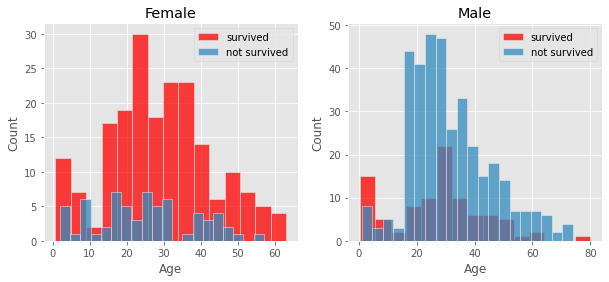

In [182]:
survived(data)

## Creating Age Bins

In [9]:
bins = [0, 10, 20,30, 40 , 50 , 60 ,90]
bin_labels = ['<10','10-19', '20-29', '30-39', '40-49', '50-59', '>60']
df["Age_Group"] = pd.cut(df ['Age'], bins, right= False, labels = bin_labels)
# df 

In [284]:
df["Age_Group"].isnull().value_counts()

False    891
Name: Age_Group, dtype: int64

## Age Imputation 

### Inspecting appropriate attributes

In [275]:
df.groupby([
    'Pclass', 
           "Sex",
            'not_single',
        'Survived',
        #'Embarked'
   # 'relatives'
     #       'Age_Group',
           ])\
                [['Age',
                 ]]\
                .agg({"count",
                     'mean', 'std'
                     }
                    ).round(1)

Age            
                                    std count  mean
Pclass Sex    not_single Survived                  
1      female 0.0        0          NaN     1  50.0
                         1         11.7    31  34.5
              1.0        0         16.3     2  13.5
                         1         14.2    51  35.2
       male   0.0        0         13.6    34  47.5
                         1         13.1    20  39.6
              1.0        0         14.9    27  40.9
                         1         16.2    20  32.8
2      female 0.0        0         16.6     3  39.7
                         1         10.0    27  32.7
              1.0        0         10.1     3  32.3
                         1         13.6    41  25.0
       male   0.0        0         13.2    58  33.6
                         1         15.9     5  37.6
              1.0        0          9.8    26  32.9
                         1          9.7    10   5.2
3      female 0.0        0          7.9    17  25.0
                         1         11.1    21  22.4
              1.0        0         14.6    38  23.3
                         1         12.9    26  16.9
       male   0.0        0         11.3   161  29.3
                         1          7.1    26  28.2
              1.0        0         12.6    54  21.0
                         1          8.3    12   9.4

### Imputing Age by `Pcalss`, `Sex` and `not_single` 

In [278]:
df['Age'].fillna(df.groupby([
        'Pclass', 
        "Sex",
        'not_single',
     #   'Embarked',
])['Age'].transform('mean'), inplace = True)


In [329]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
relatives        0
not_single       0
not_alone        0
Age_Group        0
AdCh             0
Embarked_N       0
dtype: int64

In [59]:
df["Age"].isnull().value_counts()

False    891
Name: Age, dtype: int64

### Age Groups

In [281]:
agg_analysis = df.groupby('Age_Group')['Sex'].agg(['count'])
agg_analysis

,count
Age_Group,
<10,62
10-19,102
20-29,220
30-39,167
40-49,89
50-59,48
>60,26


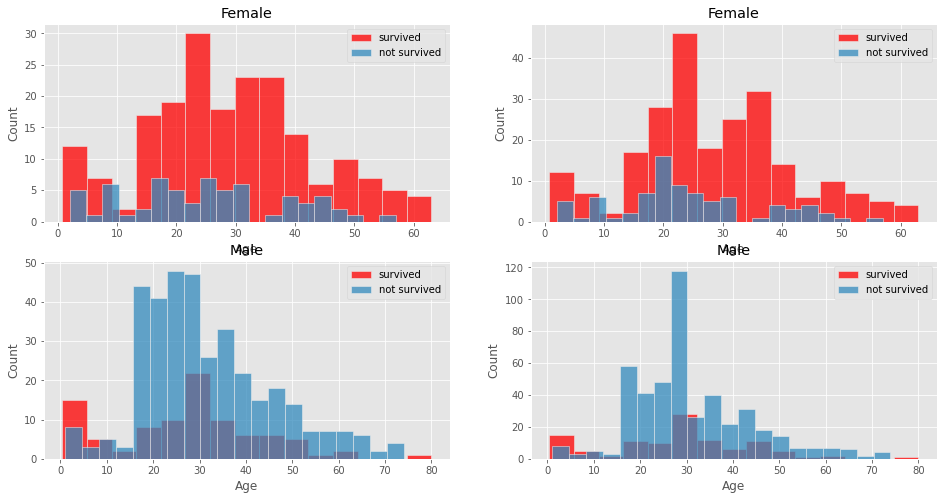

In [201]:
survived_explicit(data, df)

## Input 2 missing embarked rows

In [323]:
df.groupby(['Sex', 'Embarked',])['Age'].mean() # thera are no corrlation between emabarking and survivial rate\
#- this attribute can be used for Age imputation along with `Survived` attribute

Sex     Embarked
female  C           28.117962
        Q           23.598139
        S           27.772136
male    C           32.703970
        Q           28.617195
        S           30.498111
Name: Age, dtype: float64

In [327]:
common_emb = 'S'

for dataset in df:
    df['Embarked'] = df['Embarked'].fillna(common_emb)


# df.dropna(axis = 0, subset = ['Embarked'], inplace = True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
relatives        0
not_single       0
not_alone        0
Age_Group        0
AdCh             0
Embarked_N       0
dtype: int64

## Converting Emabarking into int

In [316]:
for dataset in df:
    df.loc[df['Embarked'] == "S", 'Embarked_N'] = 1
    df.loc[df['Embarked'] == "C", 'Embarked_N'] = 2
    df.loc[df['Embarked'] == "Q", 'Embarked_N'] = 3
    df.loc[df['Embarked'] == "NA", 'Embarked_N'] = 0
    df['Embarked_N'] = df['Embarked_N'].astype(int)

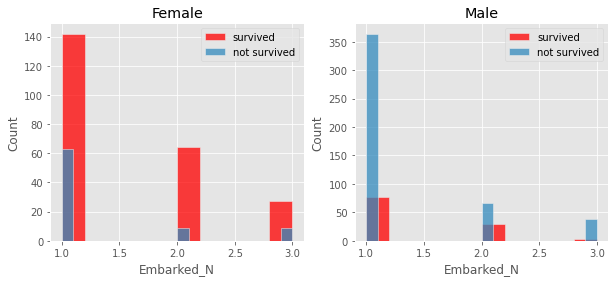

In [319]:
survived_column(df, 'Embarked_N')

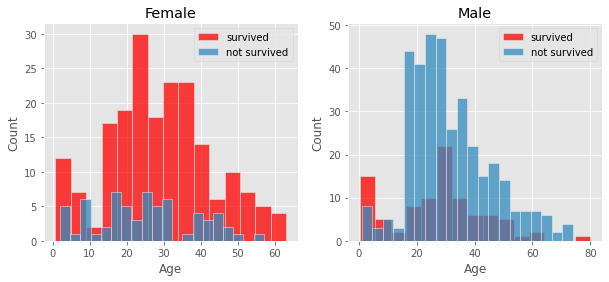

In [177]:
survived(df)

# Adult Children

This attribute checks survival rate between Adult and Children

In [296]:
bins = [0, 14,  90]
bin_labels = ['Child','Adult']
df["AdCh"] = pd.cut(df ['Age'], bins, right= False, labels = bin_labels)
# df 

In [300]:
df.groupby(['AdCh', 'Sex', "Pclass"])['Survived'].agg({'count','mean'}).round(2)

count  mean
AdCh  Sex    Pclass             
Child female 1           1  0.00
             2           9  1.00
             3          24  0.50
      male   1           3  1.00
             2           9  1.00
             3          25  0.36
Adult female 1          93  0.98
             2          67  0.91
             3         120  0.50
      male   1         119  0.35
             2          99  0.08
             3         322  0.12

In [299]:
# df.loc[(df["Age"] > 14)].count()

# Dropping Attributes

In [334]:
df.drop(['PassengerId', 'Ticket', 'not_alone', 'Fare', 'Cabin' ], axis = 1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,relatives,not_single,Age_Group,AdCh,Embarked_N
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,S,1,1,20-29,Adult,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,C,1,1,30-39,Adult,2
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,S,0,0,20-29,Adult,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,S,1,1,30-39,Adult,1
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,S,0,0,30-39,Adult,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,S,0,0,20-29,Adult,1
887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,S,0,0,10-19,Adult,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,20.671875,1,2,S,3,1,20-29,Adult,1
889,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,C,0,0,20-29,Adult,2


# Compare

In [325]:
def compare_df(one, two):
    df_compare = pd.DataFrame({
        "Before Imputation": one,
        "After Imputation" : two,
    })
    #display(df_compare)
    df_compare.hist(figsize=(20,10))
    plt.gcf().set_facecolor("white")
    return

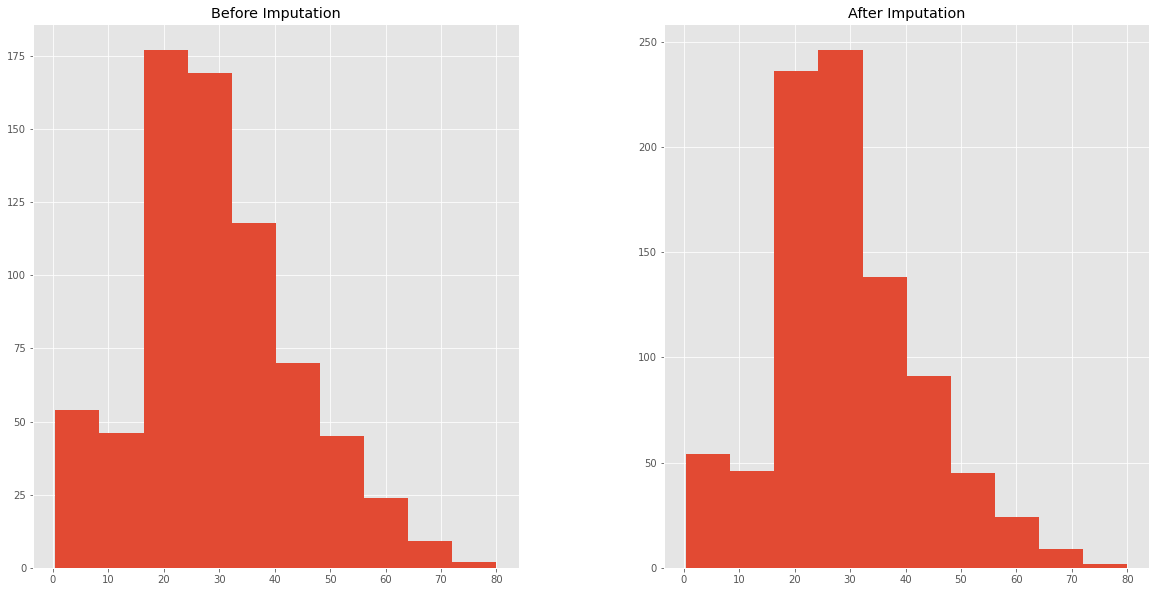

In [326]:
compare_df(data['Age'], df["Age"])

In [354]:
df.groupby(['Pclass', "Sex"])['Age'].transform('median').value_counts()

25.0    347
21.5    144
40.0    122
30.0    108
35.0     94
28.0     76
Name: Age, dtype: int64

In [355]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Farther analysis

In [356]:
data.Survived.isnull().value_counts()

False    891
Name: Survived, dtype: int64

In [357]:
data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [358]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [388]:
data_survived = df.groupby('Survived')
# print(data_survived.groups)
data_survived.get_group(1)
data_survived.mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,relatives,not_alone
Survived,,,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887,0.883424,0.681239
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408,0.938596,0.476608


In [329]:
data_survived = df.groupby( 'not_single')
data_survived.groups
data_survived.get_group(1)
data_survived.mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_N,relatives,not_alone
not_single,,,,,,,,,,
0.0,458.00000,0.303538,2.400372,31.957312,0.000000,0.000000,21.242689,1.370577,0.000000,1.0
1.0,427.79661,0.505650,2.169492,25.887584,1.316384,0.960452,48.832275,1.347458,2.276836,0.0


In [377]:
df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64